In [1]:
import pandas as pd
import numpy as np

In [2]:
original_df = pd.read_csv("./data/processed_movie_data.csv", delimiter=';', encoding='utf-8')
original_df

,budget,genres,imdb_id,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,overview_length,sentiment,year,month,weekday,genre_id
0,30000000.0,Animation,tt0114709,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,1.0,1.0,1995-10-30,373554033.0,81.0,1.0,7.7,5415.0,303,0.112121,1995,10,0,0
1,65000000.0,Adventure,tt0113497,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,3.0,1.0,1995-12-15,262797249.0,104.0,2.0,6.9,2413.0,395,-0.218750,1995,12,4,1
2,16000000.0,Comedy,tt0114885,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,1.0,1.0,1995-12-22,81452156.0,127.0,1.0,6.1,34.0,270,0.600000,1995,12,4,2
3,60000000.0,Action,tt0113277,Heat,"Obsessive master thief, Neil McCauley leads a ...",17.924927,3.0,1.0,1995-12-15,187436818.0,170.0,2.0,7.7,1886.0,335,-0.053571,1995,12,4,3
4,35000000.0,Action,tt0114576,Sudden Death,International action superstar Jean Claude Van...,5.231580,3.0,1.0,1995-12-22,64350171.0,106.0,1.0,5.5,174.0,448,-0.116667,1995,12,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4680,2196531.0,Comedy,tt0453365,FC Venus,"Pete is a football enthusiast, who plays as a ...",0.947509,1.0,1.0,2005-12-30,2411594.0,107.0,1.0,5.6,10.0,669,0.102083,2005,12,4,2
4681,12000000.0,Action,tt0479751,சிவாஜி,Corrupt police and politicians target a comput...,1.323587,1.0,1.0,2007-06-14,19000000.0,185.0,2.0,6.9,25.0,117,-0.055556,2007,6,3,3
4682,800000.0,Comedy,tt0933361,Dikari,"The sea, August, interesting and simple people...",0.903061,0.0,0.0,2006-11-23,1328612.0,100.0,1.0,5.8,6.0,378,0.380000,2006,11,3,2
4683,2000000.0,Romance,tt1718881,Про любоff,"У девушки Даши, приехавшей с подругой «покорят...",0.121844,1.0,1.0,2010-09-30,1268793.0,107.0,1.0,4.0,3.0,534,0.000000,2010,9,3,9


In [3]:
original_df = original_df[original_df['genres'].isin(["Action", "Comedy", "Drama"])].copy()
original_df.reset_index(drop=True, inplace=True)
original_df

,budget,genres,imdb_id,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,overview_length,sentiment,year,month,weekday,genre_id
0,16000000.0,Comedy,tt0114885,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,1.0,1.0,1995-12-22,81452156.0,127.0,1.0,6.1,34.0,270,0.600000,1995,12,4,2
1,60000000.0,Action,tt0113277,Heat,"Obsessive master thief, Neil McCauley leads a ...",17.924927,3.0,1.0,1995-12-15,187436818.0,170.0,2.0,7.7,1886.0,335,-0.053571,1995,12,4,3
2,35000000.0,Action,tt0114576,Sudden Death,International action superstar Jean Claude Van...,5.231580,3.0,1.0,1995-12-22,64350171.0,106.0,1.0,5.5,174.0,448,-0.116667,1995,12,4,3
3,62000000.0,Comedy,tt0112346,The American President,"Widowed U.S. president Andrew Shepherd, one of...",6.318445,2.0,1.0,1995-11-17,107879496.0,106.0,1.0,6.5,199.0,269,0.320000,1995,11,4,2
4,98000000.0,Action,tt0112760,Cutthroat Island,"Morgan Adams and her slave, William Shaw, are ...",7.284477,4.0,4.0,1995-12-22,10017322.0,119.0,2.0,5.7,137.0,383,-0.128571,1995,12,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2921,2000000.0,Comedy,tt1820462,Beremennyy,The main character of the film Sergey Dobrolyu...,0.397106,0.0,1.0,2011-07-21,8000000.0,81.0,1.0,3.1,7.0,922,0.086435,2011,7,3,2
2922,2196531.0,Comedy,tt0453365,FC Venus,"Pete is a football enthusiast, who plays as a ...",0.947509,1.0,1.0,2005-12-30,2411594.0,107.0,1.0,5.6,10.0,669,0.102083,2005,12,4,2
2923,12000000.0,Action,tt0479751,சிவாஜி,Corrupt police and politicians target a comput...,1.323587,1.0,1.0,2007-06-14,19000000.0,185.0,2.0,6.9,25.0,117,-0.055556,2007,6,3,3
2924,800000.0,Comedy,tt0933361,Dikari,"The sea, August, interesting and simple people...",0.903061,0.0,0.0,2006-11-23,1328612.0,100.0,1.0,5.8,6.0,378,0.380000,2006,11,3,2


In [4]:
df = original_df.copy()

In [5]:
from utils.kohonen.kohonen import build_kohonen_net, _build_kohonen_net
from utils.kohonen.neuron_neighbours import prop2iters_neighbour_radius, relu_like_neighbour_radius, exp_neighbour_radius
from utils.kohonen.neuron_lr import inv2iter_learning_rate, fixed_learning_rate
from utils.kohonen.sample_pickers import stochastic_picker

In [6]:
seed = np.random.randint(0, 65000)
seed

29377

In [7]:
init_f = "sample no repos"
init_with_sample = True
picker_f = "stochastic"
neighbour_f = prop2iters_neighbour_radius
lr_f = fixed_learning_rate
grid_type = "rectangular"

In [8]:
random_state = np.random.default_rng(seed)

In [9]:
cols = ["budget", "popularity", "production_companies", 
        "production_countries", "revenue", "runtime", 
        "spoken_languages", "vote_average", "vote_count",
        "overview_length", "sentiment", "year",
        "month", "weekday"]

In [10]:
to_normalize = cols
for i in range(len(to_normalize)):
    df[to_normalize[i]] = (df[to_normalize[i]] - df[to_normalize[i]].mean()) / df[to_normalize[i]].std()
df

,budget,genres,imdb_id,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,overview_length,sentiment,year,month,weekday,genre_id
0,-0.338627,Comedy,tt0114885,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",-0.838685,-0.857145,-0.456935,1995-12-22,0.055390,0.705233,-0.550287,-0.182833,-0.523893,-0.214532,2.538370,-0.306167,1.446282,0.602027,2
1,0.926940,Action,tt0113277,Heat,"Obsessive master thief, Neil McCauley leads a ...",1.748029,0.049746,-0.456935,1995-12-15,0.832678,2.682968,0.518863,1.576938,1.162664,0.182616,-0.525639,-0.306167,1.446282,0.602027,3
2,0.207868,Action,tt0114576,Sudden Death,International action superstar Jean Claude Van...,-0.586350,0.049746,-0.456935,1995-12-22,-0.070035,-0.260637,-0.550287,-0.842748,-0.396400,0.873043,-0.821436,-0.306167,1.446282,0.602027,3
3,0.984466,Comedy,tt0112346,The American President,"Widowed U.S. president Andrew Shepherd, one of...",-0.386470,-0.403700,-0.456935,1995-11-17,0.249207,-0.260637,-0.550287,0.257109,-0.373633,-0.220642,1.225702,-0.306167,1.155175,0.602027,2
4,2.019930,Action,tt0112760,Cutthroat Island,"Morgan Adams and her slave, William Shaw, are ...",-0.208811,0.503191,3.475392,1995-12-22,-0.468510,0.337283,0.518863,-0.622776,-0.430095,0.475895,-0.877247,-0.306167,1.446282,0.602027,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2921,-0.741307,Comedy,tt1820462,Beremennyy,The main character of the film Sergey Dobrolyu...,-1.475438,-1.310590,-0.456935,2011-07-21,-0.483305,-1.410483,-0.550287,-3.482404,-0.548481,3.769169,0.130725,0.712490,-0.009253,-0.155621,2
2922,-0.735654,Comedy,tt0453365,FC Venus,"Pete is a football enthusiast, who plays as a ...",-1.374216,-0.857145,-0.456935,2005-12-30,-0.524290,-0.214643,-0.550287,-0.732762,-0.545749,2.223346,0.204086,0.330493,1.446282,0.602027,2
2923,-0.453678,Action,tt0479751,சிவாஜி,Corrupt police and politicians target a comput...,-1.305053,-0.857145,-0.456935,2007-06-14,-0.402632,3.372876,0.518863,0.697052,-0.532089,-1.149357,-0.534941,0.457826,-0.300359,-0.155621,3
2924,-0.775822,Comedy,tt0933361,Dikari,"The sea, August, interesting and simple people...",-1.382390,-1.310590,-1.767711,2006-11-23,-0.532233,-0.536600,-0.550287,-0.512790,-0.549392,0.445345,1.506988,0.394160,1.155175,-0.155621,2


In [11]:
drama_df = df[df["genres"] == "Drama"]
comedy_df = df[df["genres"] == "Comedy"]
action_df = df[df["genres"] == "Action"]
drama_df

,budget,genres,imdb_id,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,overview_length,sentiment,year,month,weekday,genre_id
5,0.696837,Drama,tt0112641,Casino,The life of the gambling paradise – Las Vegas ...,0.315856,0.503191,0.853841,1995-11-22,0.309587,3.050919,-0.550287,1.686924,0.668171,-1.387646,-0.977706,-0.306167,1.155175,-0.913268,4
6,-0.324245,Drama,tt0114388,Sense and Sensibility,"Rich Mr. Dashwood dies, leaving his second wif...",0.414389,-0.403700,0.853841,1995-12-13,0.448108,1.119178,-0.550287,1.027009,-0.223373,-1.008828,-0.186589,-0.306167,1.446282,-0.913268,4
10,-0.695286,Drama,tt0113627,Leaving Las Vegas,"Ben Sanderson, an alcoholic Hollywood screenwr...",0.351651,-0.403700,-0.456935,1995-10-27,-0.176746,0.015326,-0.550287,0.917024,-0.222462,-0.410051,-1.446516,-0.306167,0.864068,0.602027,4
12,-0.482441,Drama,tt0112818,Dead Man Walking,A justice drama based on a true story about a ...,-0.281115,0.049746,0.853841,1995-12-29,-0.253285,0.475264,-0.550287,1.136995,-0.236122,0.115407,1.509592,-0.306167,1.446282,0.602027,4
14,-0.511204,Drama,tt0113347,How To Make An American Quilt,Soon-to-be-wed graduate student Finn Dodd deve...,-0.723475,-0.403700,-0.456935,1995-10-06,-0.369085,0.199301,-0.550287,0.257109,-0.520251,0.873043,0.612900,-0.306167,0.864068,0.602027,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2904,-0.585987,Drama,tt0449999,कभी अलविदा ना कहना,Dev and Maya are both married to different peo...,-1.112148,-0.403700,-0.456935,2006-08-11,-0.417299,3.740826,0.518863,-0.182833,-0.513876,-0.232862,0.936602,0.394160,0.281854,0.602027,4
2905,-0.698163,Drama,tt4643432,Dans les forêts de Sibérie,"Fed up with the hectic, senseless world he liv...",-1.303143,-0.857145,-0.456935,2016-06-15,-0.531031,-0.306631,1.588014,1.136995,-0.523893,1.978947,-0.534734,1.030820,-0.300359,-0.913268,4
2906,-0.770070,Drama,tt0431461,Waltzing Anna,Dr. Charlie Keegan is ordered to serve 6 month...,-1.487224,-1.310590,-1.767711,2006-08-11,-0.541893,-0.168649,-1.619438,0.807038,-0.553945,0.280376,0.763589,0.394160,0.281854,0.602027,4
2916,-0.597492,Drama,tt3266724,Black Rose,A Russian Police Major is enlisted by the LAPD...,-1.091872,-0.403700,-0.456935,2014-04-17,-0.535703,-1.318495,0.518863,-4.692247,-0.549392,-0.715549,-1.352754,0.903488,-0.882573,-0.155621,4


In [12]:
drama_df = drama_df[cols]
comedy_df = comedy_df[cols]
action_df = action_df[cols]
drama_df.sample(replace=False)

,budget,popularity,production_companies,production_countries,revenue,runtime,spoken_languages,vote_average,vote_count,overview_length,sentiment,year,month,weekday
679,0.064054,-1.003934,-0.857145,-0.456935,0.006513,0.935203,-0.550287,-0.402805,-0.502948,-1.082148,-0.274491,-0.560831,1.446282,-0.913268


In [13]:
def special_weight_init(X: np.ndarray, k: int, 
                        random_state: np.random.Generator = None) -> np.ndarray:
    n = X.shape[1]
    neuron_weights = np.zeros((k, k, n))

    if random_state is None:
        random_state = np.random.default_rng()

    for i in range(k):
        for j in range(k):
            if i > k/2:
                neuron_weights[i, j] = random_state.choice(drama_df.to_numpy())
            elif j > k/2:
                neuron_weights[i, j] = random_state.choice(comedy_df.to_numpy())
            else:
                neuron_weights[i, j] = random_state.choice(action_df.to_numpy())

    return neuron_weights
    
    

In [14]:
kohonen_net = _build_kohonen_net(df[cols].to_numpy(), cols, 10, len(cols)*500, 
                                lambda X, k : special_weight_init(X, k, random_state), lambda X, k: stochastic_picker(X, k, random_state), 
                                neighbour_f, lr_f, 
                                grid_type, True, len(cols)*10)

In [15]:
import matplotlib.pyplot as plt

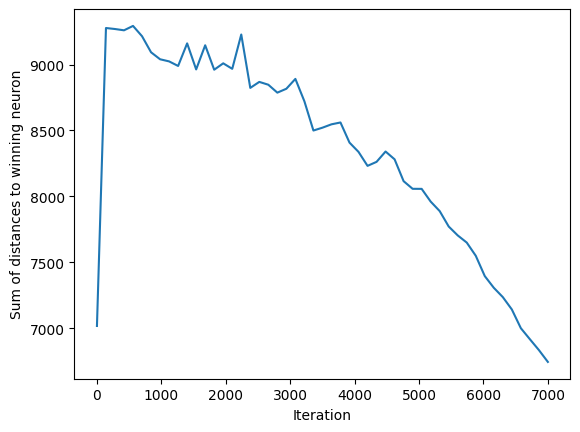

In [16]:
x_sum_dists = [t[0] for t in kohonen_net.sum_dists]
y_sum_dists = [t[1] for t in kohonen_net.sum_dists]
plt.xlabel("Iteration")
plt.ylabel("Sum of distances to winning neuron")
plt.plot(x_sum_dists, y_sum_dists)

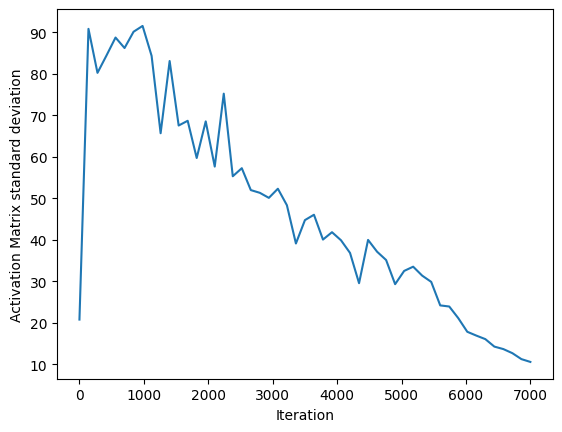

In [17]:
x_act_mat_sigmas = [t[0] for t in kohonen_net.act_mat_sigmas]
y_act_mat_sigmas = [t[1] for t in kohonen_net.act_mat_sigmas]
x_act_mat_sigmas = np.array(x_act_mat_sigmas)
y_act_mat_sigmas = np.array(y_act_mat_sigmas)
plt.xlabel("Iteration")
plt.ylabel("Activation Matrix standard deviation")
plt.plot(x_act_mat_sigmas, y_act_mat_sigmas)

In [18]:
act_mat = kohonen_net.activations_mat(df)
act_mat

array([[36, 25, 22, 43, 26, 39, 40, 16, 34, 48],
       [25, 23, 21, 16, 31, 13, 32, 32, 14, 32],
       [43, 19, 26, 22, 13, 23, 20, 29, 28, 38],
       [34, 28, 34, 10, 10, 19, 31, 32, 48, 45],
       [49, 19, 34, 34, 17, 31, 21, 19, 29, 39],
       [50, 17, 31, 30, 23, 19, 16, 24, 25, 55],
       [30, 23, 42, 23, 30, 25, 28, 40, 22, 44],
       [31, 23, 14, 19, 33, 37, 31, 24, 18, 62],
       [33, 25, 29, 12, 27, 33, 21, 26, 29, 40],
       [56, 42, 37, 17, 45, 26, 22, 35, 29, 41]])

In [19]:
act_map = kohonen_net.activations_map(df)
act_map

{(9, 6): [0,
  12,
  218,
  243,
  409,
  459,
  521,
  600,
  926,
  1713,
  1733,
  1958,
  2111,
  2319,
  2349,
  2578,
  2676,
  2690,
  2713,
  2756,
  2885,
  2887],
 (2, 1): [1,
  139,
  259,
  561,
  1392,
  1838,
  2051,
  2323,
  2398,
  2405,
  2426,
  2525,
  2542,
  2623,
  2650,
  2721,
  2726,
  2854,
  2861],
 (6, 6): [2,
  8,
  45,
  100,
  144,
  197,
  263,
  318,
  420,
  447,
  468,
  503,
  554,
  583,
  598,
  599,
  705,
  839,
  1085,
  1143,
  1144,
  1171,
  1334,
  1433,
  1476,
  1603,
  1695,
  1811],
 (9, 5): [3,
  37,
  153,
  162,
  408,
  463,
  534,
  802,
  892,
  1354,
  1388,
  1459,
  1484,
  1554,
  1696,
  1754,
  1822,
  1918,
  2150,
  2160,
  2179,
  2359,
  2388,
  2417,
  2727,
  2880],
 (9, 1): [4,
  97,
  112,
  278,
  628,
  798,
  877,
  985,
  1078,
  1087,
  1227,
  1260,
  1547,
  1550,
  1551,
  1643,
  1679,
  1746,
  1766,
  1799,
  1864,
  1871,
  1913,
  2019,
  2032,
  2106,
  2166,
  2250,
  2279,
  2292,
  2293,
  2315,
  24

In [20]:
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', None)

display(df.iloc[act_map[(0,0)]])

,budget,genres,imdb_id,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,overview_length,sentiment,year,month,weekday,genre_id
79,0.783126,Comedy,tt0109830,Forrest Gump,A man with a low IQ has accomplished great thi...,7.335502,-0.857145,-0.456935,1994-07-06,4.430049,1.395141,-0.550287,2.126866,6.864357,0.616424,1.173798,-0.369833,-0.009253,-0.913268,2
322,4.953744,Drama,tt0120338,Titanic,"84 years later, a 101-year-old woman named Ros...",3.396586,0.049746,-0.456935,1997-11-18,12.989435,3.786820,4.795467,1.356966,6.521035,2.296666,1.202261,-0.178835,1.155175,-1.670916,4
1439,3.515600,Action,tt0372784,Batman Begins,"Driven by tragedy, billionaire Bruce Wayne ded...",3.693827,1.410081,0.853841,2005-06-10,2.202529,1.303153,1.588014,1.356966,6.285172,-0.220642,-1.467826,0.330493,-0.300359,0.602027,3
1717,3.515600,Drama,tt0480249,I Am Legend,Robert Neville is a scientist who was unable t...,0.544261,1.410081,-0.456935,2007-12-14,3.750951,-0.490606,-0.550287,0.697052,3.977539,0.427015,-1.488070,0.457826,1.446282,0.602027,4
1769,3.227971,Action,tt0371746,Iron Man,"After being held captive in an Afghan cave, bi...",2.510901,-0.403700,-0.456935,2008-04-30,3.749669,0.659240,2.657165,1.246981,7.596534,-1.057708,-1.007007,0.521492,-0.882573,-0.913268,3
2011,3.803228,Action,tt1375666,Inception,"Cobb, a skilled thief who commits corporate es...",3.804687,0.049746,0.853841,2010-07-14,5.512450,1.671104,-0.550287,2.016881,12.262798,-0.153432,-0.326581,0.648824,-0.009253,-0.913268,3
2134,4.809929,Action,tt1399103,Transformers: Dark of the Moon,Sam Witwicky takes his first tenuous steps int...,-0.720248,0.503191,-0.456935,2011-06-28,7.699542,1.947067,-0.550287,-0.182833,2.496793,0.048197,-0.290118,0.712490,-0.300359,-1.670916,3
2142,3.227971,Action,tt0458339,Captain America: The First Avenger,"Predominantly set during World War II, Steve R...",2.005249,-0.403700,-0.456935,2011-07-22,2.175768,0.567252,1.588014,0.367095,5.978277,0.262046,-2.283677,0.712490,-0.009253,0.602027,3
2209,6.391888,Action,tt1345836,The Dark Knight Rises,Following the death of District Attorney Harve...,2.236786,0.503191,-0.456935,2012-07-16,7.414926,2.452999,-0.550287,1.466952,7.880663,0.750843,-0.484542,0.776156,-0.009253,-2.428563,3
2275,5.385187,Action,tt0948470,The Amazing Spider-Man,Peter Parker is an outcast high schooler aband...,4.171417,0.049746,-0.456935,2012-06-27,4.974746,1.119178,-0.550287,0.257109,5.577583,2.033937,0.438101,0.776156,-0.300359,-0.913268,3


In [21]:
u_mat = kohonen_net.u_mat()
u_mat

array([[3.02912911, 2.73962126, 2.20451304, 1.6589676 , 1.68286139,
        1.8828993 , 1.69386869, 1.68526863, 1.38153387, 1.39923022],
       [2.33430713, 1.9853123 , 1.5915193 , 1.23011835, 1.16749279,
        1.49693965, 1.33358278, 1.4086018 , 1.28858701, 1.43275829],
       [1.66612874, 1.39141659, 1.3416189 , 1.21412667, 1.06348895,
        1.18687282, 1.13911632, 1.20203512, 1.16902014, 1.29060917],
       [1.2774574 , 1.02682895, 1.14307733, 1.03625079, 1.05858448,
        1.08316226, 1.14789367, 1.19174896, 1.02386033, 0.94295847],
       [1.43880955, 1.20397436, 1.24741592, 1.1092056 , 0.98852811,
        1.02736169, 1.16338115, 1.09428004, 0.91128297, 0.88847559],
       [1.40457374, 1.06467437, 1.19015409, 1.1491284 , 0.92085727,
        0.78960168, 0.88506689, 0.93455101, 0.90931436, 0.98817816],
       [1.49293304, 1.16999009, 1.27429817, 1.19584445, 1.15897012,
        0.8829211 , 0.83437755, 0.88589302, 0.8702814 , 1.07367844],
       [1.46099964, 1.28155612, 1.203566 

In [22]:
from utils.kohonen.plots import plot_u_mat, plot_mat

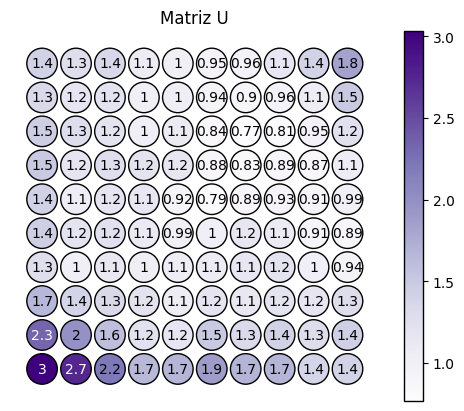

In [23]:
plot_u_mat(kohonen_net, u_mat)

In [24]:
kohonen_net.neuron_weights

array([[[ 3.65307974,  3.15851837,  1.17835293, ...,  0.77488315,
         -0.07280638, -0.79694505],
        [ 3.11512917,  1.61172263,  0.81431847, ...,  0.5569794 ,
         -0.07353149, -0.4530312 ],
        [ 1.58539281,  0.85571437,  0.40959333, ...,  0.20203612,
          0.21971295,  0.30310798],
        ...,
        [-0.64590002,  0.45238523, -0.69143912, ..., -2.379616  ,
          0.43082612,  0.75557397],
        [-0.71556007, -0.18083444, -0.78278519, ..., -2.95585476,
          0.65942999, -0.07625472],
        [-0.7439574 , -0.58180044, -0.769769  , ..., -3.36225132,
          0.35861843, -1.1656681 ]],

       [[ 1.72833886,  2.26756265,  1.25285978, ...,  0.4862994 ,
          0.05365238, -0.14634417],
        [ 1.88270836,  1.43540579,  0.97704141, ...,  0.5022263 ,
         -0.12192583, -0.23409935],
        [ 1.16929095,  0.62074151,  0.35517408, ...,  0.29920698,
          0.09530912,  0.3037113 ],
        ...,
        [-0.57797739,  0.37052395, -0.47443413, ..., -

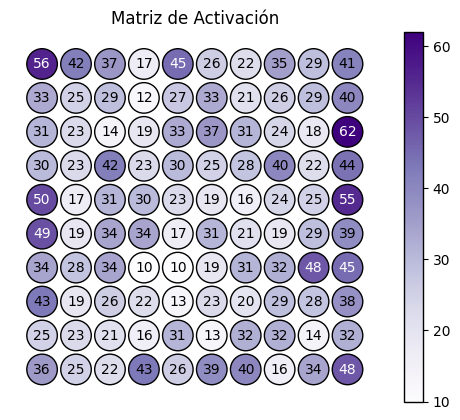

In [25]:
plot_mat(kohonen_net, act_mat, "Matriz de Activación")

In [26]:
kohonen_net.init_neuron_weights

array([[[-7.41306909e-01,  1.21338594e+00, -8.57144734e-01, ...,
         -2.91647574e+00, -8.82573097e-01, -2.42856323e+00],
        [ 6.39311430e-01,  2.41060000e-01, -4.03699518e-01, ...,
          5.85157696e-01,  5.72961162e-01, -1.55620696e-01],
        [ 1.64601230e+00, -6.44044783e-01,  1.41008135e+00, ...,
          1.39495258e-01, -1.17367995e+00, -1.55620696e-01],
        ...,
        [ 6.39311430e-01,  1.06225104e-01, -4.03699518e-01, ...,
         -1.13382599e+00, -3.00359394e-01,  6.02026817e-01],
        [-7.42745053e-01, -9.92582362e-01, -8.57144734e-01, ...,
          6.48823758e-01, -1.17367995e+00, -1.55620696e-01],
        [-5.39966734e-01, -1.39392643e-02, -8.57144734e-01, ...,
          2.66827383e-01, -5.91466246e-01,  2.11732184e+00]],

       [[-1.08523503e-01,  5.24068290e-01, -8.57144734e-01, ...,
          2.03161321e-01, -1.75589365e+00,  6.02026817e-01],
        [ 9.26940250e-01,  1.21710506e+00,  5.03190915e-01, ...,
          1.03082013e+00, -1.17367995e

In [27]:
kohonen_net.neuron_positions[0,0]

array([0., 0.])

In [28]:
from utils.distance import euclidean_distance

if init_with_sample:
    init_sample = dict()
    sample_to_neu = dict()

    for idx, sample in df.iterrows():
        sample_df = sample.to_frame().T
        X_p = sample_df[cols].to_numpy().astype(float)
        for i in range(kohonen_net.k):
            for j in range(kohonen_net.k):
                dist = euclidean_distance(np.reshape(X_p, (X_p.size,)), np.reshape(kohonen_net.init_neuron_weights[i, j], (X_p.size,)))
                if dist <= np.finfo(float).eps:
                    init_sample[(i, j)] = idx
                    sample_to_neu[idx] = (i, j)

    display(init_sample)

{(2, 2): 7,
 (3, 8): 30,
 (8, 5): 34,
 (8, 3): 38,
 (1, 3): 85,
 (4, 8): 191,
 (9, 8): 274,
 (4, 6): 295,
 (2, 4): 305,
 (3, 6): 354,
 (7, 4): 358,
 (0, 0): 378,
 (7, 1): 402,
 (9, 7): 456,
 (4, 3): 488,
 (1, 6): 508,
 (4, 9): 518,
 (7, 9): 568,
 (3, 2): 614,
 (6, 7): 634,
 (5, 9): 681,
 (9, 4): 731,
 (8, 0): 763,
 (0, 7): 765,
 (3, 9): 794,
 (4, 7): 820,
 (2, 3): 842,
 (2, 9): 889,
 (7, 7): 900,
 (4, 2): 905,
 (6, 0): 916,
 (0, 4): 917,
 (7, 0): 947,
 (0, 2): 955,
 (6, 2): 986,
 (2, 6): 1006,
 (4, 4): 1009,
 (5, 5): 1009,
 (4, 1): 1024,
 (6, 9): 1032,
 (1, 0): 1067,
 (1, 8): 1071,
 (6, 4): 1116,
 (5, 4): 1125,
 (3, 7): 1164,
 (8, 6): 1165,
 (7, 6): 1248,
 (0, 9): 1313,
 (0, 3): 1373,
 (3, 0): 1389,
 (7, 2): 1391,
 (2, 7): 1400,
 (6, 6): 1430,
 (8, 9): 1437,
 (7, 5): 1443,
 (3, 5): 1472,
 (9, 0): 1496,
 (6, 3): 1513,
 (5, 7): 1520,
 (9, 5): 1611,
 (5, 6): 1645,
 (5, 3): 1742,
 (0, 6): 1900,
 (0, 1): 1911,
 (1, 7): 1947,
 (1, 5): 1958,
 (2, 1): 1998,
 (9, 2): 2068,
 (0, 5): 2126,
 (5, 8

In [29]:
if init_with_sample:
    init_sample_vals = list(init_sample.values())
    display(original_df.iloc[init_sample_vals])

,budget,genres,imdb_id,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,overview_length,sentiment,year,month,weekday,genre_id
7,60000000.0,Action,tt0113845,Money Train,A vengeful New York transit cop decides to ste...,7.337906,1.0,1.0,1995-11-21,35431113.0,103.0,1.0,5.4,224.0,133,0.018182,1995,11,1,3
30,7000000.0,Comedy,tt0116324,Flirting with Disaster,"Adopted as a child, new father Mel Colpin (Ben...",5.579088,1.0,1.0,1996-03-22,14702438.0,92.0,1.0,6.3,66.0,470,0.061616,1996,3,4,2
34,52000000.0,Drama,tt0112384,Apollo 13,The true story of technical troubles that scut...,18.761467,2.0,1.0,1995-06-30,355237933.0,140.0,1.0,7.3,1637.0,322,0.120000,1995,6,4,4
38,27000000.0,Drama,tt0112857,Devil in a Blue Dress,"In late 1940s Los Angeles, Easy Rawlins is an ...",4.646132,2.0,1.0,1995-09-15,16140822.0,102.0,1.0,6.3,88.0,442,0.022222,1995,9,4,4
85,30000000.0,Action,tt0111257,Speed,Los Angeles SWAT cop Jack Traven is up against...,10.859292,1.0,1.0,1994-06-09,350448145.0,116.0,1.0,6.8,1814.0,290,-0.037500,1994,6,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2816,144000000.0,Action,tt1289401,Ghostbusters,"Following a ghost invasion of Manhattan, paran...",17.162744,7.0,1.0,2016-07-14,229147509.0,116.0,1.0,5.3,2203.0,205,0.000000,2016,7,3,3
2834,25000000.0,Action,tt2461150,Masterminds,A night guard at an armored car company in the...,9.434588,4.0,2.0,2016-09-29,29200000.0,94.0,2.0,5.6,600.0,122,0.000000,2016,9,3,3
2846,7500000.0,Drama,tt0410454,The Work and the Glory,When Benjamin Steed and Mary Ann Steed relocat...,0.527570,0.0,0.0,2004-11-24,3347647.0,110.0,1.0,6.1,7.0,447,0.096591,2004,11,2,4
2887,10400000.0,Drama,tt5074352,दंगल,Dangal is an extraordinary true story based on...,8.792104,2.0,1.0,2016-12-23,310000000.0,161.0,1.0,8.0,140.0,232,0.394444,2016,12,4,4


In [30]:
from utils.pca import pca, plot_pca
import seaborn as sns

In [31]:
pca_data = pca(original_df, cols)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/pauli/Git/unsupervised-learning/utils/pca.py:50: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(pca_data.xs[i], pca_data.ys[i], s=200, label=varnames, c=colors[i])


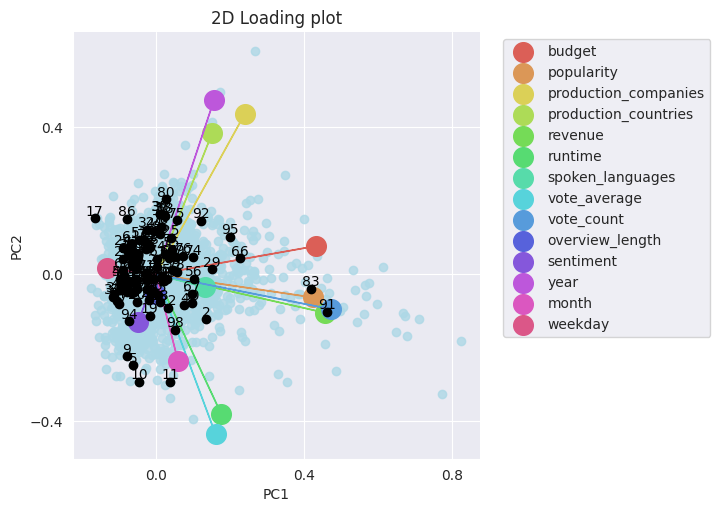

In [32]:
if init_with_sample:
    data = pca_data.pca_df_scaled.iloc[init_sample_vals].to_numpy()
    sns.set_style("darkgrid")
    plot_pca(pca_data)
    plt.scatter(data[:,0], data[:, 1], color="k")
    for i in range(data.shape[0]):
        plt.annotate("{}".format(i), xy=(data[i, 0], data[i, 1]), 
                    textcoords="data", ha="center", va="bottom", color="k")

In [33]:
if init_with_sample:
    vals_dict = dict()
    vals_dict["Neuron"] = []
    for i in range(len(init_sample_vals)):
        vals_dict["Neuron"].append(sample_to_neu[init_sample_vals[i]])
    vals_dict_df = pd.DataFrame(data=vals_dict)
    display(vals_dict_df)

,Neuron
0,"(2, 2)"
1,"(3, 8)"
2,"(8, 5)"
3,"(8, 3)"
4,"(1, 3)"
...,...
95,"(1, 2)"
96,"(3, 1)"
97,"(8, 8)"
98,"(8, 7)"


In [34]:
drama_mat = np.zeros((kohonen_net.k, kohonen_net.k), dtype=int)
action_mat = np.zeros((kohonen_net.k, kohonen_net.k), dtype=int)
comedy_mat = np.zeros((kohonen_net.k, kohonen_net.k), dtype=int)
for i in range(kohonen_net.k):
    for j in range(kohonen_net.k):
        curr_neu = (i, j)
        count_genres = dict()
        count_genres["Drama"] = 0
        count_genres["Action"] = 0
        count_genres["Comedy"] = 0
        if curr_neu in act_map:
            for idx, sample in df.iloc[act_map[curr_neu]].iterrows():
                count_genres[sample["genres"]] += 1
        drama_mat[i, j] = count_genres["Drama"]
        action_mat[i, j] = count_genres["Action"]
        comedy_mat[i, j] = count_genres["Comedy"]

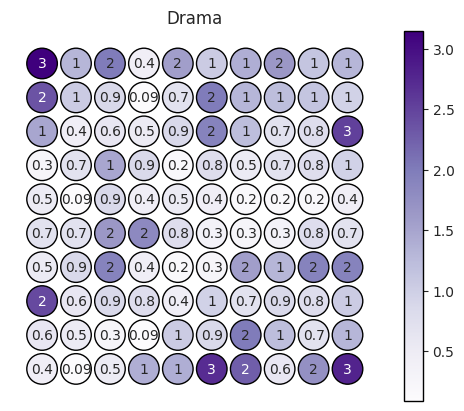

In [49]:
drama_rel_mat = drama_mat * 100 / drama_mat.sum()
plot_mat(kohonen_net, drama_rel_mat, "Drama", "{:.1g}")

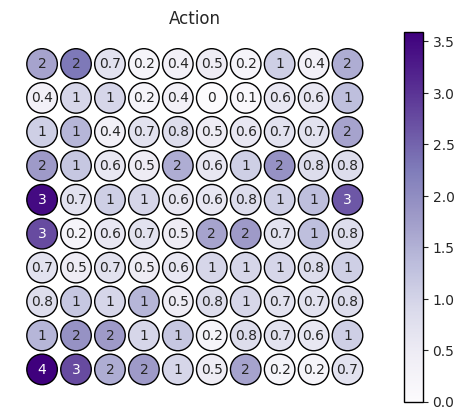

In [50]:
action_rel_mat = action_mat * 100 / action_mat.sum()
plot_mat(kohonen_net, action_rel_mat, "Action", "{:.1g}")

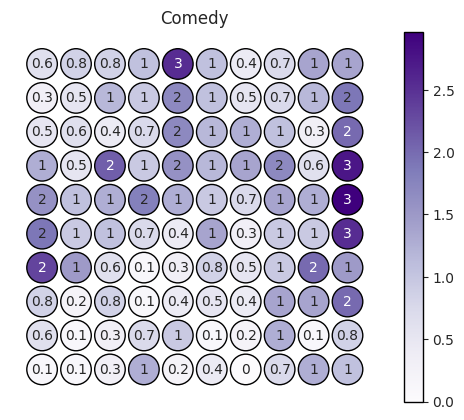

In [51]:
comedy_rel_mat = comedy_mat * 100 / comedy_mat.sum()
plot_mat(kohonen_net, comedy_rel_mat, "Comedy", "{:.1g}")

In [54]:
decision_mat = np.zeros((kohonen_net.k, kohonen_net.k), dtype=int)
for i in range(kohonen_net.k):
    for j in range(kohonen_net.k):
        index = np.argmax([drama_rel_mat[i, j], action_rel_mat[i, j], comedy_rel_mat[i, j]])
        decision_mat[i, j] = index

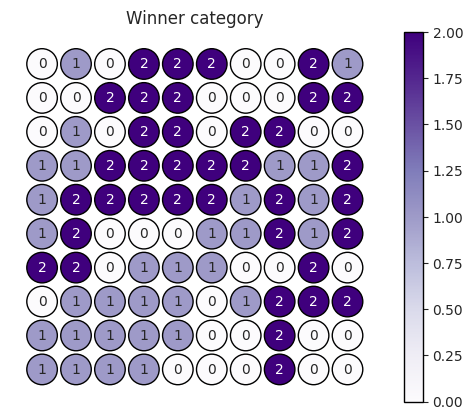

In [55]:
plot_mat(kohonen_net, decision_mat, "Winner category")

In [56]:
cat_dict = {
    "Category" : ["Drama", "Action", "Comedy"]
}
cat_df = pd.DataFrame(data=cat_dict)
cat_df

,Category
0,Drama
1,Action
2,Comedy


In [99]:
from confusion_matrix import calculate_confusion_matrix, calculate_relative_confusion_matrix, calculate_per_label_confusion_matrix, metrics
from plotter import plot_confusion_matrix

In [77]:
prediction_dict = dict()
expected_dict = dict()
for idx, pred in (df[cols].apply(kohonen_net.predict, axis=1)).items():
    prediction = cat_df.iloc[decision_mat[pred[0], pred[1]]].get(0)
    prediction_dict[idx] = prediction
    expected_dict[idx] = df.iloc[idx]["genres"]

In [92]:
rel_conf_mat = calculate_relative_confusion_matrix(np.array(["Comedy", "Action", "Drama"]), prediction_dict, expected_dict)
rel_conf_mat

,Comedy,Action,Drama
Comedy,0.553439,0.229630,0.216931
Action,0.276647,0.482635,0.240719
Drama,0.286213,0.177138,0.536649


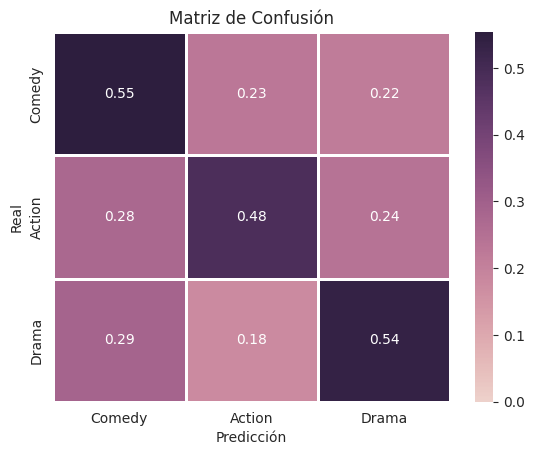

In [95]:
plot_confusion_matrix(rel_conf_mat, "Matriz de Confusión", format=".2g")

In [100]:
per_label_conf_mat = calculate_per_label_confusion_matrix(np.array(["Comedy", "Action", "Drama"]), prediction_dict, expected_dict)

In [101]:
metrics(per_label_conf_mat)

{'Comedy': {'TP': 523.0,
  'FP': 559.0,
  'FN': 422.0,
  'TN': 1422.0,
  'Precision': 0.4833641404805915,
  'Recall': 0.5534391534391534,
  'F1 Score': 0.5160335471139615,
  'Accuracy': 0.66473000683527},
 'Action': {'TP': 403.0,
  'FP': 420.0,
  'FN': 432.0,
  'TN': 1671.0,
  'Precision': 0.4896719319562576,
  'Recall': 0.48263473053892214,
  'F1 Score': 0.4861278648974668,
  'Accuracy': 0.7088174982911825},
 'Drama': {'TP': 615.0,
  'FP': 406.0,
  'FN': 531.0,
  'TN': 1374.0,
  'Precision': 0.6023506366307542,
  'Recall': 0.5366492146596858,
  'F1 Score': 0.5676049838486387,
  'Accuracy': 0.6797676008202324}}